In [1]:
import numpy as np
import pylab as pl
import pandas as pd
%matplotlib inline

This is assignment 1 for DATA201 in 2023. There are four assignments, and we will take your best three marks for them, so you can drop one without penalty. 

Use this notebook as the basis for your solution, complete the code parts, and upload the notebook to Nuku. The due date is Thursday 3rd August before midnight. It can be submitted up to 3 days late (Saturday night) with a 10% penalty on your mark per day. So no need to ask for an extension! 

Please note that all the assignments in the course are individual. It's fair enough to talk about the assignment with each other, and to discuss strategies, but the final result must be your own work. If we spot identical answers we will treat them as plagiarism. 

Ponui Island in the Hauraki Gulf has a healthy population of North Island Brown Kiwi (Apteryx mantelli). Since around 2001, my collaborator Isabel Castro has been studying a subset of this population. She and I now co-manage this project. We have around 50 birds that have radio telemetry transmitters, so that we can catch them, monitor their health, and sometimes use them in experiments looking at their behaviour. 

In this assignment, and also assignment 3, you are going to look at some of the annual measurements that we and our students and various volunteers have made of the birds. Please don't share this data, we are still using it as the basis for scientific papers.

We start by reading in the dataset:

In [2]:
df = pd.read_excel('PonuiMeasurements.xlsx')
df.head()

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight
0,Ivan,m,2012-03-18,91.6,NaN,NaN,89.5,NaN,NaN,10.9,NaN,NaN,13.2,NaN,NaN,NaN,1920.0
1,Genesis,m,2012-03-18,92.5,NaN,NaN,88.2,NaN,NaN,13.0,NaN,NaN,15.6,NaN,NaN,NaN,2180.0
2,Dario,m,2012-03-18,89.5,NaN,NaN,87.5,NaN,NaN,12.7,NaN,NaN,14.3,NaN,NaN,NaN,2280.0
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0
4,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0


(1) Get the unique names of the birds, and work out how many datapoints there are for each bird. Then pick the 3 male and 3 female birds with the highest number of measurements (6 marks)

I did this by: 
* storing the unique names
* looping over those names, extracting the rows that match that name
* making a new dataframe that holds those names, together with the sex of the bird, and the count of the number of rows that match (use `len()` to get the number of rows in a dataframe). Remember that you can make a Python list of lists using
`nameoflist.append([])` and turn a Python list into a dataframe using `pd.DataFrame(nameoflist)`
* sorting that dataframe using `pd.sort_values()` by the count column

I've printed the first 10 elements of that dataframe so you can see the output

In [3]:
# Storing the unique names
unique_names = df["Name"].unique()
unique_names

array(['Ivan', 'Genesis', 'Dario', 'Ponui', 'Valda', 'Salome', 'Roy/Tane',
       'Kerri', 'Ken', 'George', 'Bow', 'Amanda', 'RachelT', 'Octavia',
       'Marc', 'Emily', 'Elizabeth', 'Belgarion', 'Paul', 'Minnie',
       'Jenno', 'Eco', 'Dorothy', 'Daphnae', 'Dale', 'Clel', 'Clea',
       'Anne', 'Susie', 'Lance', 'James', 'Betty', 'Sarah', 'Mauro',
       'Martin', 'Louise', 'Gaven', 'Linda', 'Jaeden', 'Hakopa', 'Scott',
       'Pat/Margm', 'Jono', 'Charlie', 'Camila', 'Tweety', 'Tako',
       'Carla', 'Babe', 'Robyn', 'Becca', 'Tui', 'Nakshatra (diamond)',
       'Denis', 'Awatea (sunrise)', 'Albert', 'Adriana', 'Vaughan',
       'Leigh', 'Tomasina', 'Tashu', 'Olivia', 'Cindy', 'Kobi', 'Karenza',
       'Jacob', 'Blandy', 'Alinka', 'Emma',
       'Un-named 3 (TX 43 FOR A MONTH OR SO', 'Teina', 'Juanito', 'Ben',
       'Ana Maria', 'Un-named 1', 'Godoy', 'Taonga', 'Laryssa', 'Yi Luo',
       'Clarah', 'Trisha', 'Noah (Buba)', 'Vincent', 'Gaia',
       'Kauri 5 - 2020', 'Kauri 4 - 202

In [4]:
# Work out how many datapoints there are for each bird
bird_counts = df['Name'].value_counts()
print(bird_counts)

Ponui       28
Linda       16
Salome      16
Paul        16
Clea        16
            ..
Robyn        1
Cindy        1
Becca        1
Tui          1
AnaMaria     1
Name: Name, Length: 114, dtype: int64


In [5]:
# Creating a list to store data
bird_data_list = []

# Loop over the unique bird names
for bird_name in unique_names:
    bird_df = df[df['Name'] == bird_name]
    unique_sexes = bird_df['sex'].dropna().unique()
    count = len(bird_df)
    bird_data_list.append([bird_name, ', '.join(map(str, unique_sexes)), count])

# Create the DataFrame
data = pd.DataFrame(bird_data_list, columns=['0', '1', '2'])

# Sorting the bird data to view the birds with the highest measurements
df1 = data.sort_values(by=['2'], ascending = False)
df1[:10]

,0,1,2
3,Ponui,m,28
37,Linda,f,16
5,Salome,f,16
18,Paul,m,16
26,Clea,f,16
44,Camila,f,16
2,Dario,m,16
14,Marc,m,15
38,Jaeden,m,15
19,Minnie,f,15


In [6]:
# Get the top birds for each sex (males and females)
top_males = data[data['1'] == 'm'].nlargest(3, '2')
top_females = data[data['1'] == 'f'].nlargest(3, '2')

# Display the top males and females
top_birds = top_males['0'].tolist() + top_females['0'].tolist()
top_birds

['Ponui', 'Dario', 'Paul', 'Salome', 'Clea', 'Linda']

(2) For the 6 birds you've identified, plot a box and whisker plot for their weights. (2 marks)

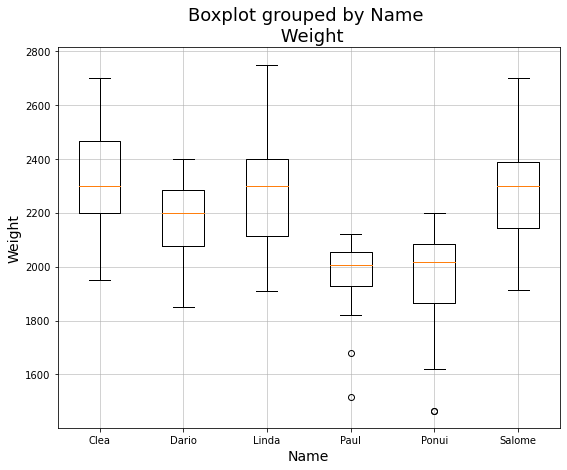

In [7]:
six_birds = ['Clea', 'Dario', 'Linda', 'Paul', 'Ponui', 'Salome']
df_identified = df[df['Name'].isin(six_birds)]

# Dictionary created to store weights for each identified bird
bird_weights = {bird: df_identified[df_identified['Name'] == bird]['Weight'].dropna() for bird in six_birds}

# Box and whisker plot using matplotlib
pl.figure(figsize = (9, 7))
pl.boxplot(bird_weights.values(), labels=bird_weights.keys())
pl.title('Boxplot grouped by Name \n Weight', fontsize = 18)
pl.xlabel('Name', fontsize = 14)
pl.ylabel('Weight', fontsize = 14) # Not in example graph but may as well be there, unsure of units
pl.grid(axis = 'both', linestyle = '-', alpha=0.7)
pl.show()

<Axes: title={'center': 'Weight'}, xlabel='Name'>

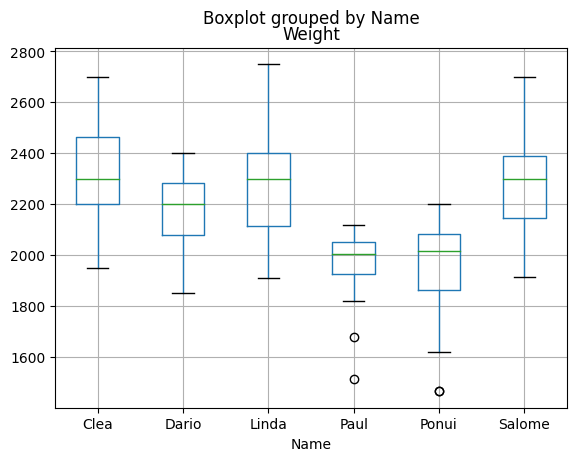

In [244]:
# Example boxplot

(3) For the same birds, plot the time series of their weights, with a separate graph for the males and females (2 marks)

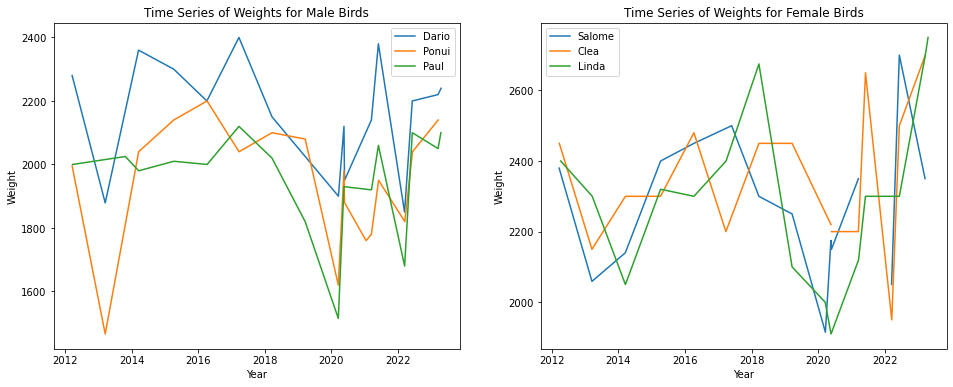

In [8]:
male_birds = ['Dario', 'Ponui', 'Paul']
female_birds = ['Salome', 'Clea', 'Linda']

male_data = df[df['Name'].isin(male_birds)]
female_data = df[df['Name'].isin(female_birds)]

# Create separate graphs for males and females
pl.figure(figsize=(16, 6))

# Plot for males
pl.subplot(1, 2, 1)
for bird_name in male_birds:
    bird_data = male_data[male_data['Name'] == bird_name]
    pl.plot(bird_data['Date'], bird_data['Weight'], label=bird_name)
pl.title('Time Series of Weights for Male Birds')
pl.xlabel('Year')
pl.ylabel('Weight')
pl.legend()

# Plot for females
pl.subplot(1, 2, 2)
for bird_name in female_birds:
    bird_data = female_data[female_data['Name'] == bird_name]
    pl.plot(bird_data['Date'], bird_data['Weight'], label=bird_name)
pl.title('Time Series of Weights for Female Birds')
pl.xlabel('Year')
pl.ylabel('Weight')
pl.legend()

pl.show()

If you look at those graphs, you can see that while the weights vary, they all dropped in 2013/2014 and 2020. The next thing we are going to do is see why that happened, which is drought. 

We'll start by loading a different rain dataset, this one for the rain falling on nearby Waiheke Island:

In [9]:
rain = pd.read_csv('daily_data.csv')
rain.head()

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq
0,1962,20120101:0800,7.2,-,18.6,0.0,24.0,D
1,1962,20120102:0800,2.6,-,20.7,0.0,24.0,D
2,1962,20120103:0800,0.0,-,25.5,0.0,24.0,D
3,1962,20120104:0800,0.8,-,29.4,0.0,24.0,D
4,1962,20120105:0800,3.4,-,30.8,0.0,24.0,D


(4) Split the Date(NZST) column into date and time columns, and tell Pandas that the date column is a date. (2 marks)

In [10]:
rain[['Date','Time']] = rain['Date(NZST)'].str.split(':',expand=True)
rain['Date'] = pd.to_datetime(rain['Date'],format = "%Y-%m-%d")
rain.head()

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq,Date,Time
0,1962,20120101:0800,7.2,-,18.6,0.0,24.0,D,2012-01-01,0800
1,1962,20120102:0800,2.6,-,20.7,0.0,24.0,D,2012-01-02,0800
2,1962,20120103:0800,0.0,-,25.5,0.0,24.0,D,2012-01-03,0800
3,1962,20120104:0800,0.8,-,29.4,0.0,24.0,D,2012-01-04,0800
4,1962,20120105:0800,3.4,-,30.8,0.0,24.0,D,2012-01-05,0800


It's actually the Deficit that we are interested in to spot drought.

(5) Get the mean average of the Deficit for each year from 2012 to 2023. (4 marks)

I did this in a similar way to question (1): look over the years, finding the rows that match that year (remember that `Date.dt.year` will pull the year out of a date-based column called `Date`), computing the mean of those using `Deficit.mean()` and putting the year and mean value into a Python list, then turning it into a dataframe called `deficit`. I also gave the 2 columns of the new dataframe names using `deficit.columns = ['Year','Deficit']`

There is a plot of the output below.

In [11]:
# Shows the unique years
unique_years = rain['Date'].dt.year.unique()
unique_years

# Extract year from the 'Date' column and create a new 'Year' column
rain['Year'] = rain['Date'].dt.year

# Get the deficit mean for each year
deficit_mean = rain.groupby('Year')['Deficit'].mean()

# Create a df with the mean values
deficit = pd.DataFrame(deficit_mean).reset_index()

# Rename the columns of the new df
deficit.columns = ['Year', 'Deficit']

# Display the df
deficit

,Year,Deficit
0,2012.0,49.597541
1,2013.0,65.045330
2,2014.0,63.640274
3,2015.0,68.088462
4,2016.0,63.700273
5,2017.0,48.424658
6,2018.0,49.230137
7,2019.0,67.554945
8,2020.0,81.884932
9,2021.0,64.495604


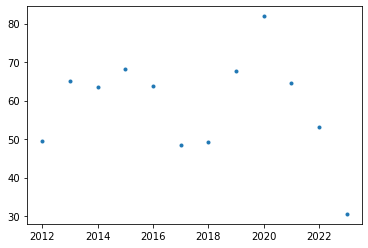

In [12]:
pl.plot(deficit.Year,deficit.Deficit,'.')

(6) Compute the correlation coefficient for each of your chosen 6 bird's weight with the deficit. The main measurement that we take is in March, when we catch all the birds to change their transmitters, and conduct health checks, so use the March measurement. Conclude whether or not you agree with me that drought is the reason for the catastrophic weight loss. (4 marks)

I did this by:
* looping over the birds and
    - extracting the rows for that bird and putting them into a new dataframe
    - extracting the rows of the new dataframe where the month was 3 (March) and putting them into another dataframe
    - merging the rainfall dataframe and the new one by matching on the year
    - computing and printing the correlation coefficient

In [13]:
# Looping over the birds and extracting the rows for that bird and putting them into a new dataframe
bird_list = ['Dario', 'Ponui', 'Salome', 'Paul', 'Clea', 'Linda']
empty_list = []

for bird in bird_list:
    bird_df = df[df['Name'] == bird][['Name', 'Date', 'Weight']]
    
    empty_list.append(bird_df)

new_df = pd.concat(empty_list, ignore_index=True)
new_df.head()

,Name,Date,Weight
0,Dario,2012-03-18,2280.0
1,Dario,2013-03-16,1879.0
2,Dario,2014-03-17,2360.0
3,Dario,2015-04-08,2300.0
4,Dario,2016-04-05,2200.0


In [14]:
# Extracting the rows of the new df where the month was march and putting them into another dataframe
another_df = new_df[new_df['Date'].dt.month == 3]
another_df.head()

,Name,Date,Weight
0,Dario,2012-03-18,2280.0
1,Dario,2013-03-16,1879.0
2,Dario,2014-03-17,2360.0
5,Dario,2017-03-23,2400.0
6,Dario,2018-03-21,2150.0


In [15]:
# Adding a column "Year" to the new one to allow for a merge by year
another_df = another_df.copy()
another_df['Year'] = another_df['Date'].dt.year
another_df.tail()

,Name,Date,Weight,Year
99,Linda,2019-03-20,2100.0,2019
100,Linda,2020-03-17,2000.0,2020
102,Linda,2021-03-18,2120.0,2021
104,Linda,2022-03-18,2300.0,2022
106,Linda,2023-03-20,2700.0,2023


In [16]:
rain.head() # checking for "Year" column
rain_df = rain[rain['Date'].dt.month == 3] # making these months march
rain_df

,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq,Date,Time,Year
60,1962,20120301:0800,6.8,-,69.6,0.0,24.0,D,2012-03-01,0800,2012.0
61,1962,20120302:0800,0.0,-,72.9,0.0,24.0,D,2012-03-02,0800,2012.0
62,1962,20120303:0800,12.6,-,63.7,0.0,24.0,D,2012-03-03,0800,2012.0
63,1962,20120304:0800,0.6,-,66.5,0.0,24.0,D,2012-03-04,0800,2012.0
64,1962,20120305:0800,0.0,-,69.9,0.0,24.0,D,2012-03-05,0800,2012.0
...,...,...,...,...,...,...,...,...,...,...,...
4096,1962,20230327:0800,0.0,-,57.5,0.0,24.0,D,2023-03-27,0800,2023.0
4097,1962,20230328:0800,1.0,-,60.0,0.0,24.0,D,2023-03-28,0800,2023.0
4098,1962,20230329:0800,1.0,-,62.6,0.0,24.0,D,2023-03-29,0800,2023.0
4099,1962,20230330:0800,0.0,-,66.1,0.0,24.0,D,2023-03-30,0800,2023.0


In [17]:
# Merging the rainfall dataframe and the new one by matching on the year
m = pd.merge(another_df, rain_df, on=["Year"])
m

,Name,Date_x,Weight,Year,Station,Date(NZST),Amount,SofG,Deficit,Runoff,Period,Freq,Date_y,Time
0,Dario,2012-03-18,2280.0,2012,1962,20120301:0800,6.8,-,69.6,0.0,24.0,D,2012-03-01,0800
1,Dario,2012-03-18,2280.0,2012,1962,20120302:0800,0.0,-,72.9,0.0,24.0,D,2012-03-02,0800
2,Dario,2012-03-18,2280.0,2012,1962,20120303:0800,12.6,-,63.7,0.0,24.0,D,2012-03-03,0800
3,Dario,2012-03-18,2280.0,2012,1962,20120304:0800,0.6,-,66.5,0.0,24.0,D,2012-03-04,0800
4,Dario,2012-03-18,2280.0,2012,1962,20120305:0800,0.0,-,69.9,0.0,24.0,D,2012-03-05,0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,Linda,2019-03-20,2100.0,2019,1962,20190327:0800,0.0,-,130.7,0.0,24.0,D,2019-03-27,0800
1918,Linda,2019-03-20,2100.0,2019,1962,20190328:0800,6.6,-,125.0,0.0,24.0,D,2019-03-28,0800
1919,Linda,2019-03-20,2100.0,2019,1962,20190329:0800,1.0,-,125.2,0.0,24.0,D,2019-03-29,0800
1920,Linda,2019-03-20,2100.0,2019,1962,20190330:0800,0.2,-,126.1,0.0,24.0,D,2019-03-30,0800


In [18]:
# Computing and printing the correlation coefficient 
grouped = m.groupby('Name')

for bird_name, group_data in grouped:
    correlation_coefficient = np.corrcoef(group_data['Weight'], group_data['Deficit'])
    print(f"{bird_name}:")
    print(correlation_coefficient)

Clea:
[[ 1.        -0.3820814]
 [-0.3820814  1.       ]]
Dario:
[[ 1.         -0.47019691]
 [-0.47019691  1.        ]]
Linda:
[[ 1.         -0.63304966]
 [-0.63304966  1.        ]]
Paul:
[[ 1.         -0.52684395]
 [-0.52684395  1.        ]]
Ponui:
[[ 1.         -0.45852494]
 [-0.45852494  1.        ]]
Salome:
[[ 1.         -0.56308792]
 [-0.56308792  1.        ]]


In [256]:
# Example answer

Dario [[ 1.         -0.46909726]
 [-0.46909726  1.        ]]
Ponui [[ 1.         -0.57054416]
 [-0.57054416  1.        ]]
Salome [[ 1.         -0.60977481]
 [-0.60977481  1.        ]]
Paul [[ 1.         -0.72850921]
 [-0.72850921  1.        ]]
Clea [[ 1.         -0.02447835]
 [-0.02447835  1.        ]]
Linda [[ 1.        -0.8156703]
 [-0.8156703  1.       ]]


Conclude whether or not you agree with me that drought is the reason for the catastrophic weight loss: 

We are interested in the deficit because it spots drought. We are also interested to know the there is a linear relationship between weight and deficit, and the strength of that relationship. It is important to note that association does not mean causation (therefore the deficit or drought does not cause weight loss in this example). 

Dario's correlation coefficient is -0.47, which indicates that deficit and weight are negatively moderately correlated. Ponui's correlation coefficient is -0.57, which indicates that deficit and weight are negatively moderately correlated. Salome's correlation coefficient is -0.61, which indicates that deficit and weight are negatively moderately correlated. Paul's correlation coefficient is -0.73, which indicates that deficit and weight are negatively moderately to strongly correlated. Clea's correlation coefficient is -0.02, which indicates that deficit and weight are negatively weakly correlated. Linda's correlation coefficient is -0.82, which indicates that deficit and weight are negatively strongly correlated. All correlation coefficients are negative, which indicates that as deficit increases, weight decreases. Meaning that as drought increases, the birds weights decreases. 

We cannot conclude that the drought is the only reason for the catastrophic weight loss of the birds. Almost all correlation coefficients indicate a moderate to strong negative linear relationship between weight and deficit, apart from Clea who has a negative weak linear relationship. Therefore, I disagree that drought is the reason for catastrophic weight loss of the birds, however the drought could be one of the many reasons for birds weight loss as the variables of weight and deficit are correlated for most birds, and all show a negative relationship. 

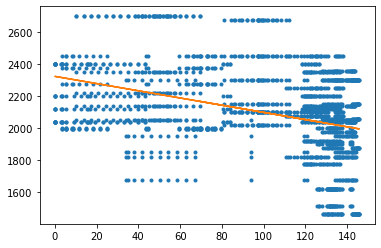

In [19]:
pl.plot(m.Deficit, m.Weight,'.')
a, b = np.polyfit(m.Deficit, m.Weight, 1)
pl.plot(m.Deficit, a*m.Deficit+b)        